#Introducción

Tenemos el siguiente escenario: Hemos sido contratados como asistente de análisis de datos en Telecom X y formaremos parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión

#📌 Extracción

Crearemos una variable dónde almacenaremos el link dónde se encuntra nuestro archivo json.

Seguido de esto la cargaremos en un DF

In [1]:
import pandas as pd

link= 'https://raw.githubusercontent.com/leonel-robles/Analisis_Evasion_Clientes/refs/heads/main/data/TelecomX_Data.json'

datos= pd.read_json(link)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

Necesitamos normalizar los datos para poder trabajar con cada columna de nuestros datos

##Normalizando Datos

In [2]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Utilizo una lista ya que a partir de la columna 3 en adelante todas necesitan ser normalizadas

In [3]:
for col in columnas[2:]:
    df_temp = pd.json_normalize(datos[col])
    datos = pd.concat([datos.drop(col, axis=1), df_temp], axis=1)

In [4]:
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


##Transformando columa Charges.Total a un dato tipo float

Tengo una columna de tipo object, lo correcto seria transformarla a un formato adecuado, en este caso; float

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
datos['Charges.Total'] = datos['Charges.Total'].astype(str).str.strip()
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Tratando datos nulos

Debo verificar que no existan registros nulos

In [7]:
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
datos[datos['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Llenaremos dichos registros con 0 ya que es un dato tipo númerico

In [9]:
datos= datos.fillna(0)
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


##Renombrando columnas

Utilizaremos el argumento inplace = True paraindica que el cambio se realizará directamente en el DataFrame original (datos) y asi evitar asignar el resultado a una nueva variable.

In [10]:
datos.rename(columns={
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Varias_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Sin_Papel',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Churn': 'Abandono'
}, inplace=True)

datos.head()

,ID_Cliente,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Manejo de inconcistencias


In [11]:
columnas = datos.columns
columnas

Index(['ID_Cliente', 'Abandono', 'Genero', 'Ciudadano_Mayor', 'Pareja',
       'Dependientes', 'Antiguedad', 'Servicio_Telefonico', 'Varias_Lineas',
       'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
       'Streaming_Peliculas', 'Contrato', 'Facturacion_Sin_Papel',
       'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales'],
      dtype='object')

El objetivo de este punto sera eliminar insoncistencias como valores '' que no represnetan nada, al igual que valores 'No internet service', ambos los cambiaremos por valores más concretros como "No" ya que siguen significando lo mismo.

In [12]:
for i in columnas:
  print(datos[i].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


###Columna "Abandono"

In [13]:
datos.Abandono.value_counts()

,count
Abandono,
No,5174
Yes,1869
,224


In [14]:
datos.Abandono = datos.Abandono.replace('', 'No')

In [15]:
datos.Abandono.value_counts()

,count
Abandono,
No,5398
Yes,1869


###Columna "Varias_Lineas"

In [16]:
datos[columnas[8]].value_counts()

,count
Varias_Lineas,
No,3495
Yes,3065
No phone service,707


In [17]:
datos[columnas[8]] = datos[columnas[8]].replace('No phone service', 'No')

In [18]:
datos.Varias_Lineas.value_counts()

,count
Varias_Lineas,
No,4202
Yes,3065


###Columna 10-15


In [19]:
for i in columnas[10:16]:
  print(datos[i].unique())

['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']


In [20]:
for i in columnas[10:16]:
  datos[i] = datos[i].replace('No internet service', 'No')

In [21]:
for i in columnas[10:16]:
  #print(datos[i].value_counts())
  print(datos[i].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']


##Creando nueva columna "Cuentas Diarias"

Esta columna nos ayudará a profundizar en el análisis y a obtener información valiosa por días.

In [22]:
datos.head()

,ID_Cliente,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [23]:
datos['Cuentas_Diarias'] = (datos['Cargos_Mensuales'] / 30).round(2)

In [24]:
datos.tail()

,ID_Cliente,Abandono,Genero,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,1.97


##Optimizando valores Yes/no -> 1/0

 El objetivo es busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Convertiremos valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

In [25]:
for i in columnas:
  datos[i] = datos[i].replace('No', 0)
  datos[i] = datos[i].replace('Yes', 1)
  print(datos[i].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
[0 1]
['Female' 'Male']
[0 1]
[1 0]
[1 0]
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
[1 0]
[0 1]
['DSL' 'Fiber optic' 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
['One year' 'Month-to-month' 'Two year']
[1 0]
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]


/tmp/ipython-input-3706436564.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[i] = datos[i].replace('Yes', 1)


#📊 Carga y análisis

##Análisis descriptivo


Este calculo nos dara métricas como la media, mediana, desviación estándar y otras medidas que ayudan a comprender mejor la distribución y el comportamiento de los clientes.

In [26]:
datos.describe()

,Abandono,Ciudadano_Mayor,Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Varias_Lineas,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Sin_Papel,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


##Distribción de Evasión

Crearemos 2 gráficos los cuales nos darán una idea clara de cuántos clientes han abandonado en comparación con los que se han quedado. El gráfico de pastel muestra la proporción, mientras que el gráfico de barras muestra los conteos absolutos.

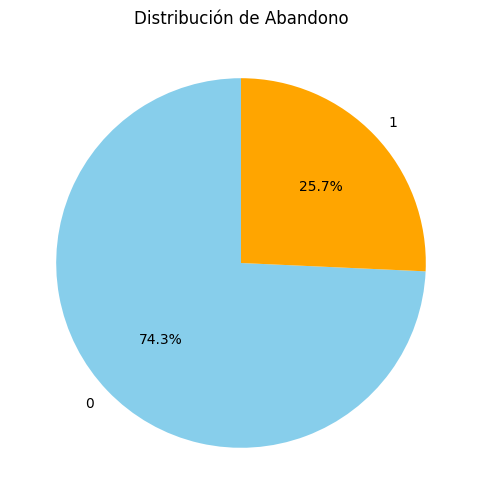

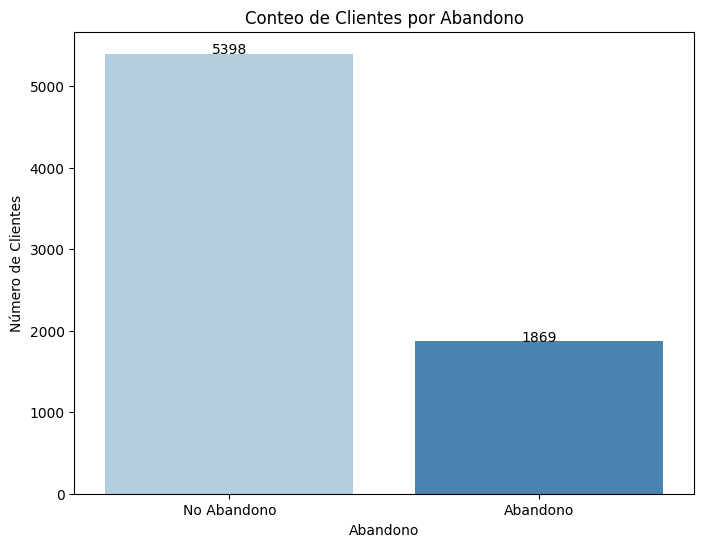

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de abandono
churn_counts = datos['Abandono'].value_counts() #Serie pandas
churn_proportions = churn_counts / len(datos)

# Graficar la distribución de abandono
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=churn_proportions.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribución de Abandono')
plt.show()

print('')
# Graficar la distribución de abandono usando countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=datos, x='Abandono', palette='Blues', hue='Abandono', legend=False)
plt.title('Conteo de Clientes por Abandono')
plt.xlabel('Abandono')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Abandono', 'Abandono'])

for i, j in enumerate(churn_counts):
    plt.text(i, j + 1, str(j), ha='center')

plt.show()

##Recuento de evasión por variables categóricas

Crearemos varias gráficas por cada categoría con las que contamos, el objetivo de esto será encontrar algún patrón o algo curioso que nos ayude a  determinar si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio o no y de esa forma tomar ciertas acciones estratégicas para reducir las cancelaciones.

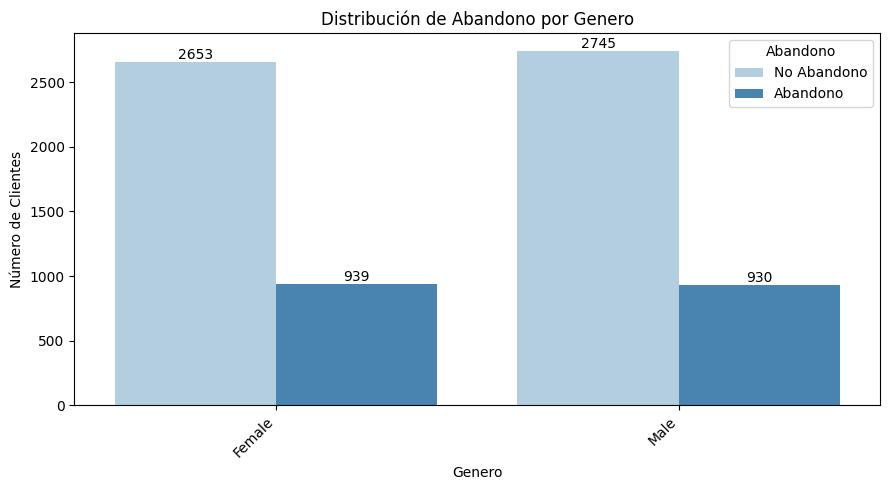

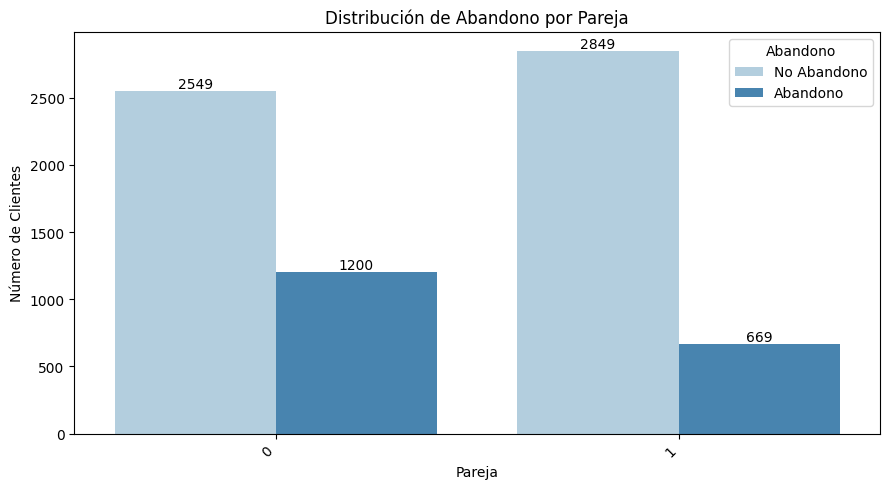

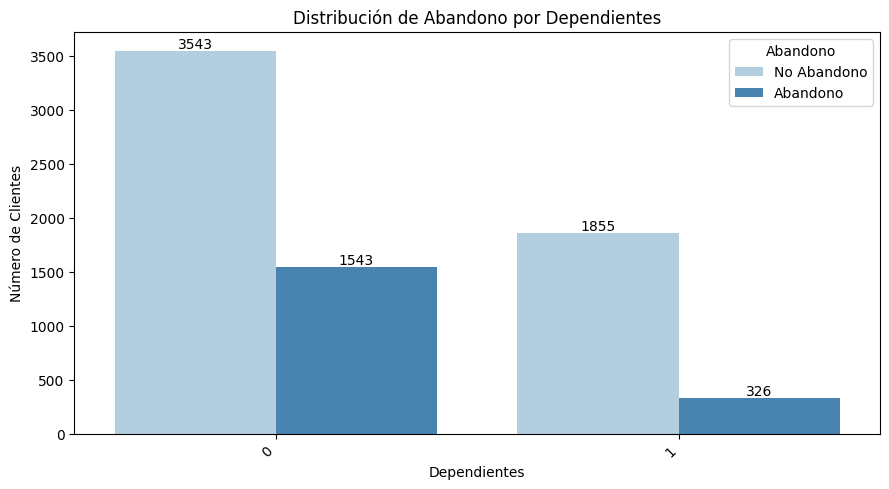

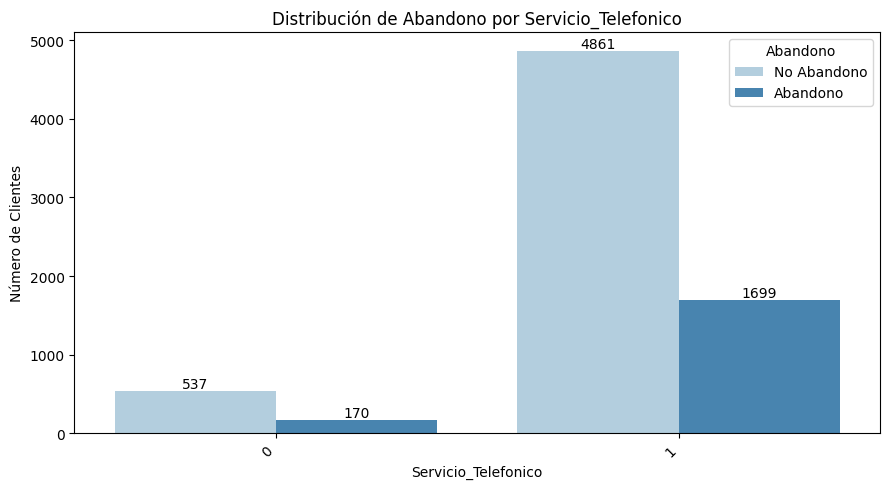

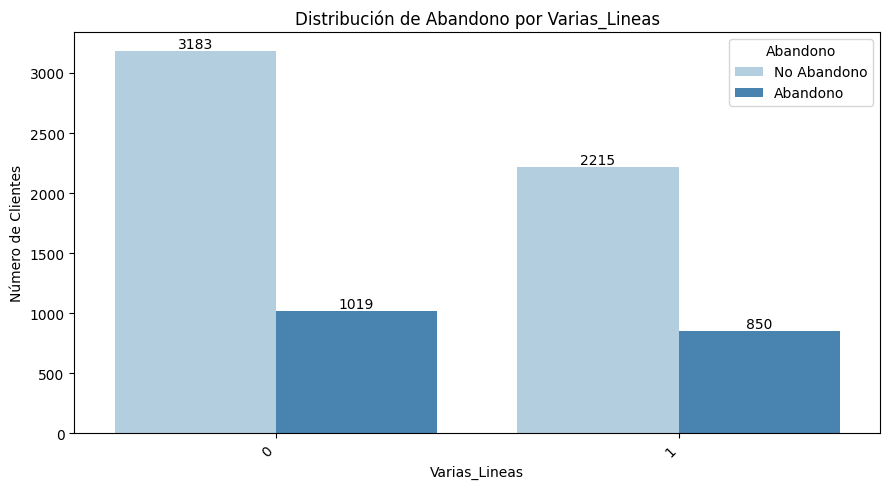

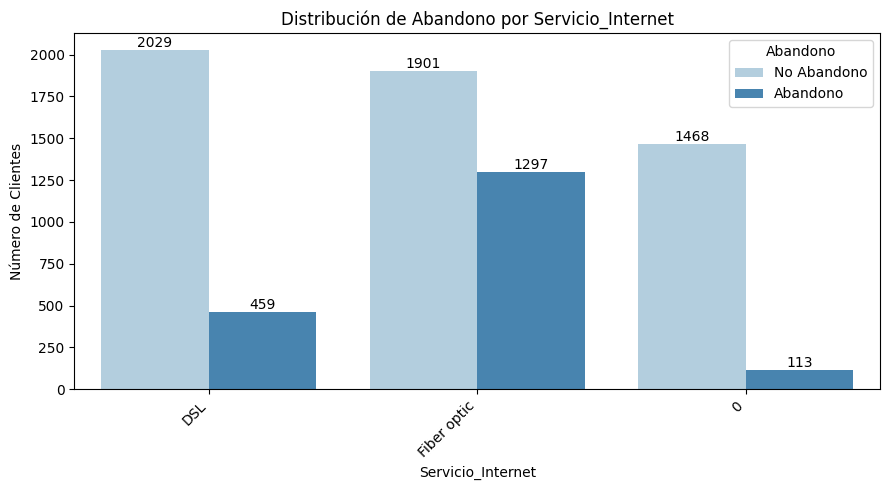

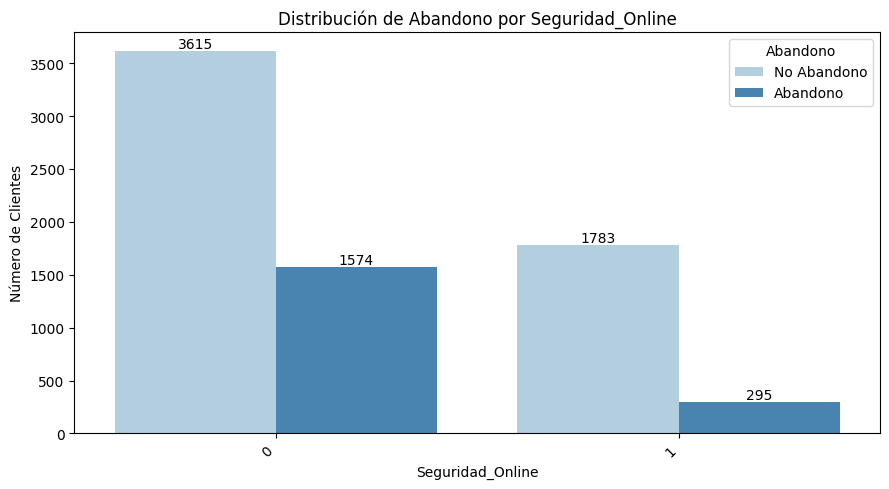

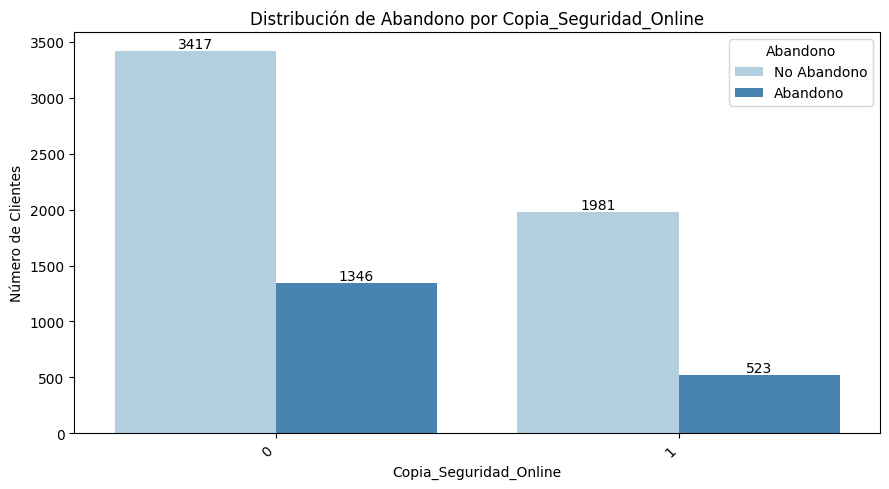

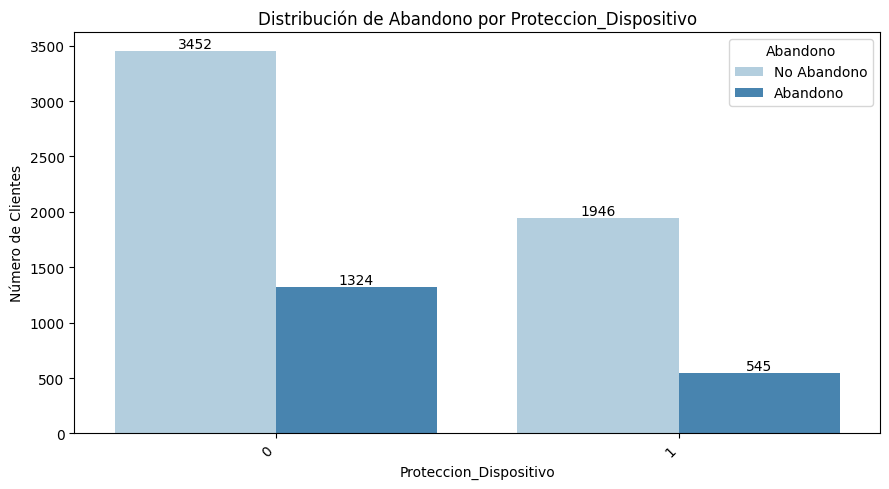

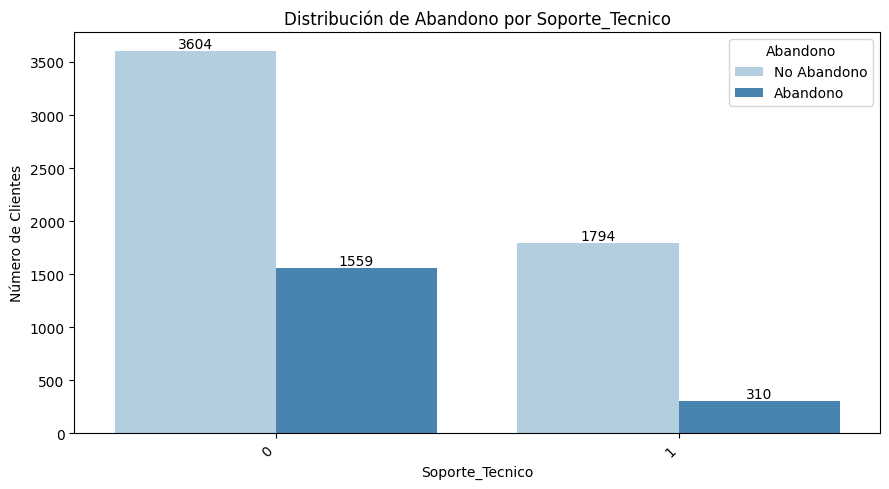

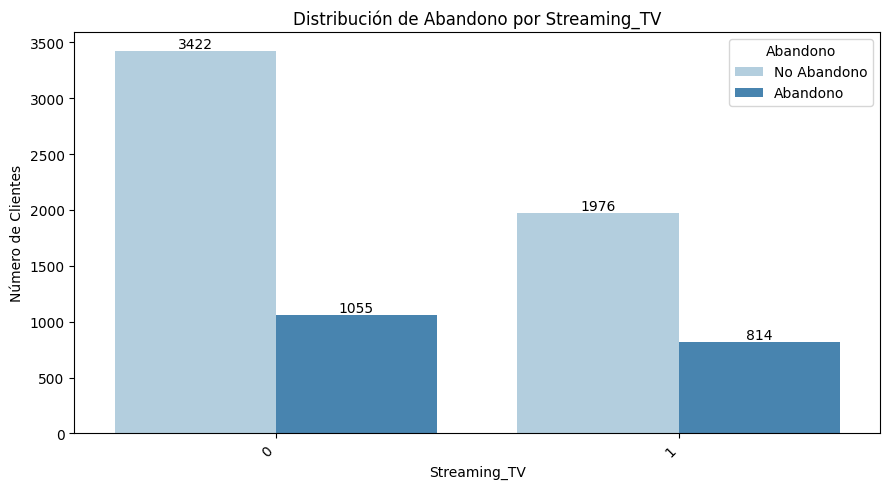

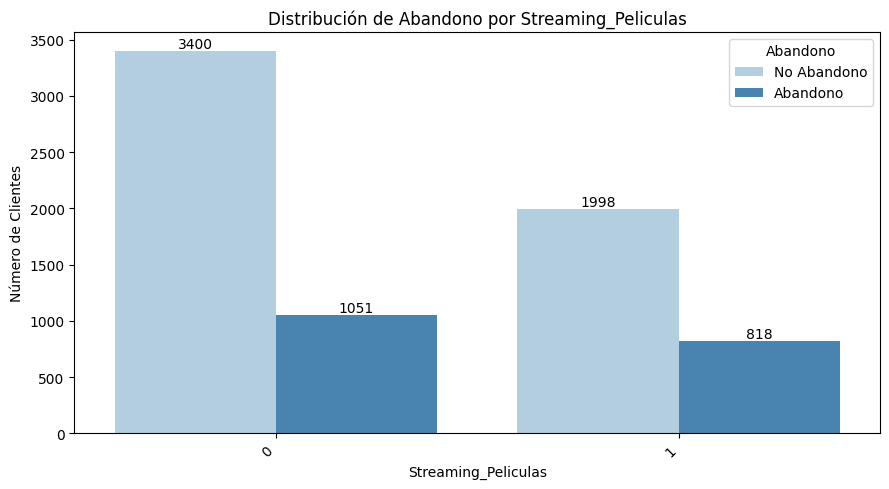

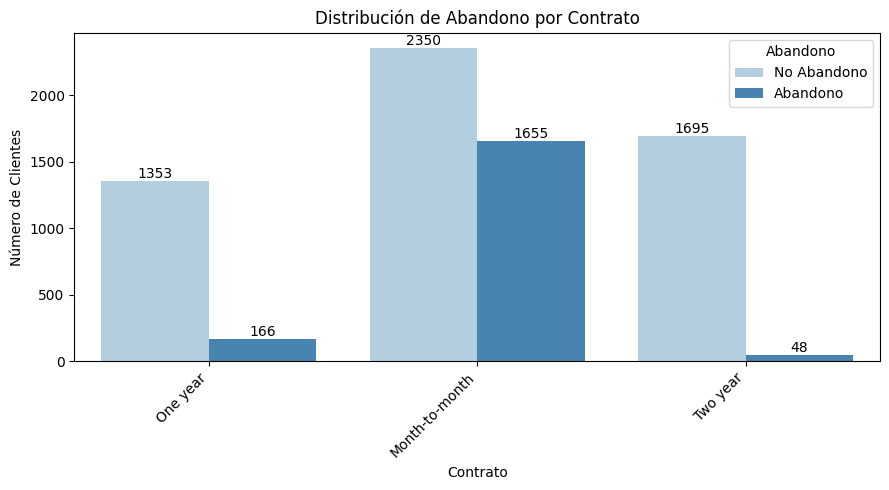

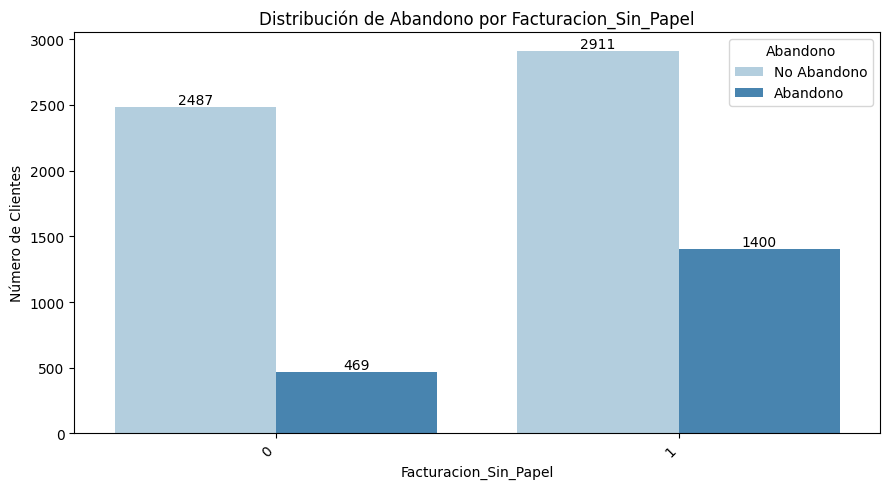

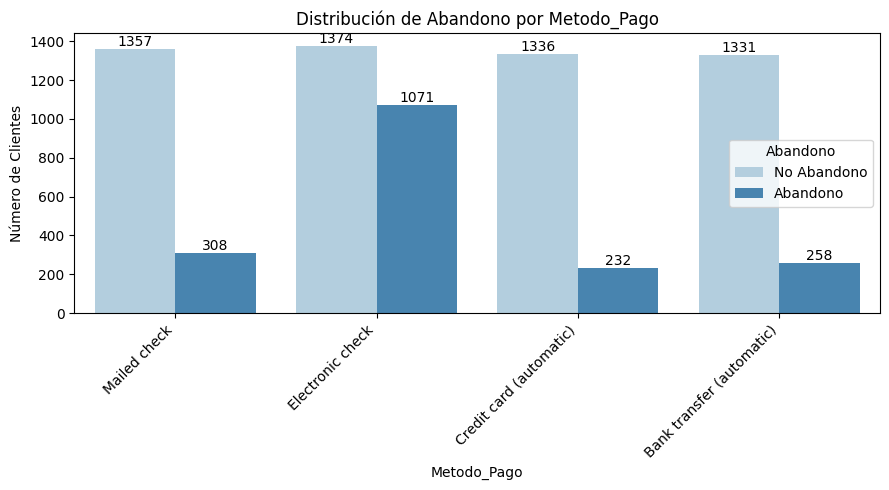

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas para analizar la evasión
categorical_cols = ['Genero', 'Pareja', 'Dependientes', 'Servicio_Telefonico', 'Varias_Lineas',
                    'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online',
                    'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
                    'Streaming_Peliculas', 'Contrato', 'Facturacion_Sin_Papel', 'Metodo_Pago']

# Analizar la evasión por cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(data=datos, x=col, hue='Abandono', palette='Blues')
    plt.title(f'Distribución de Abandono por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])
    plt.tight_layout()

    # Añadir etiquetas a las barras
    for container in ax.containers:
        ax.bar_label(container)

    plt.show()


##Conteo de evasión por variables numéricas

Al igual que el punto anterior, tomaremos todas las categorías numéricas para encontrar patrones sobre los rangos de cargos que se les hacen a los clientes e incluso la antigüedad y determinar si están afectando ciertas características.

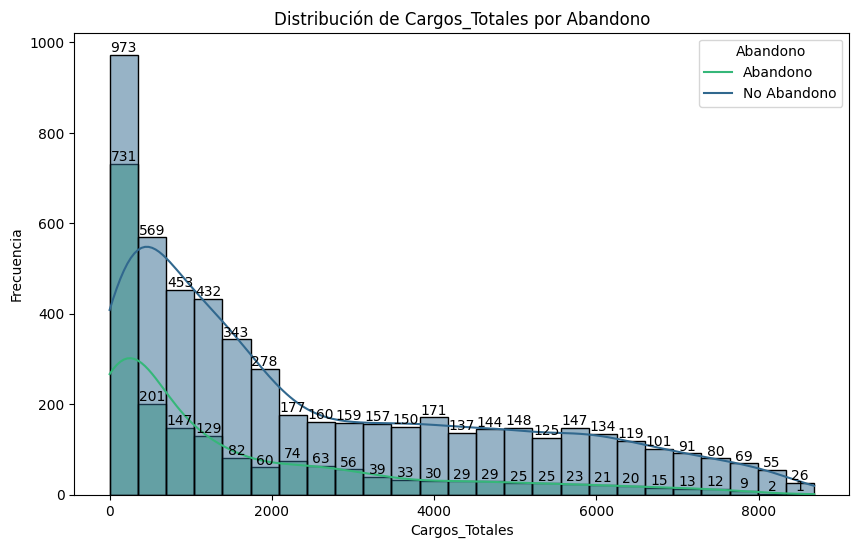

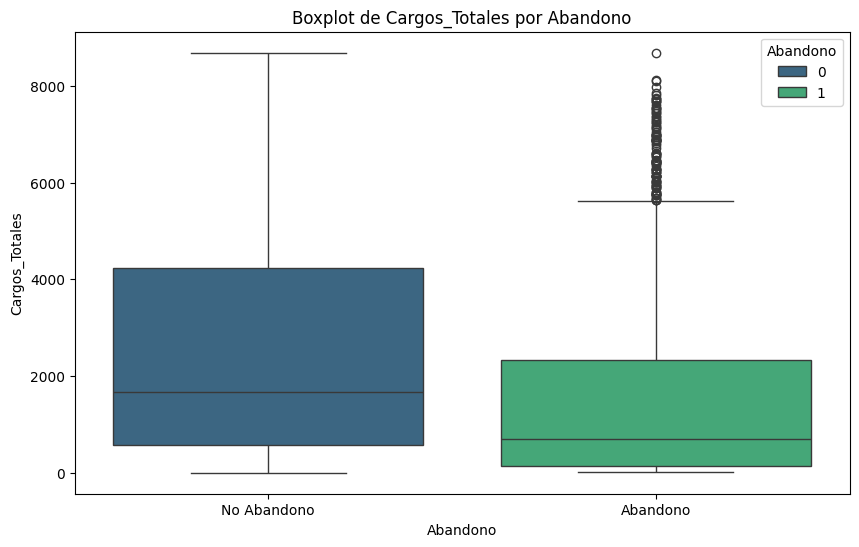

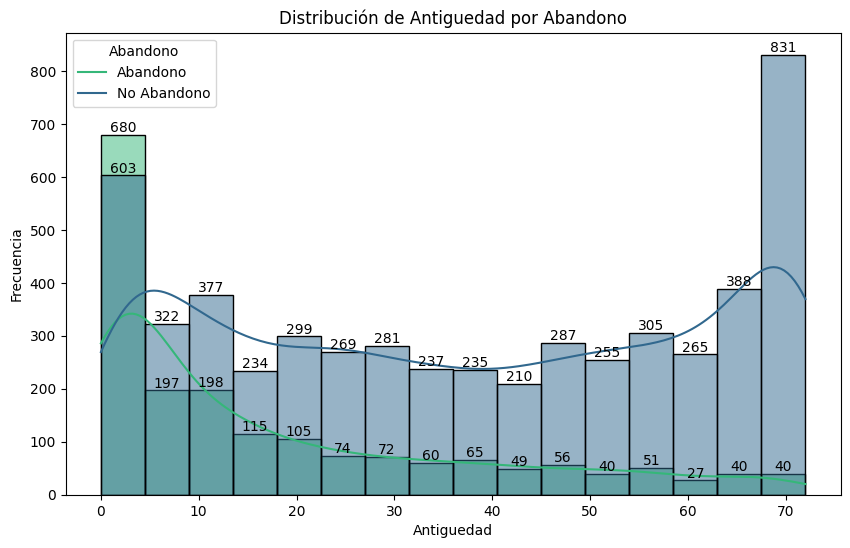

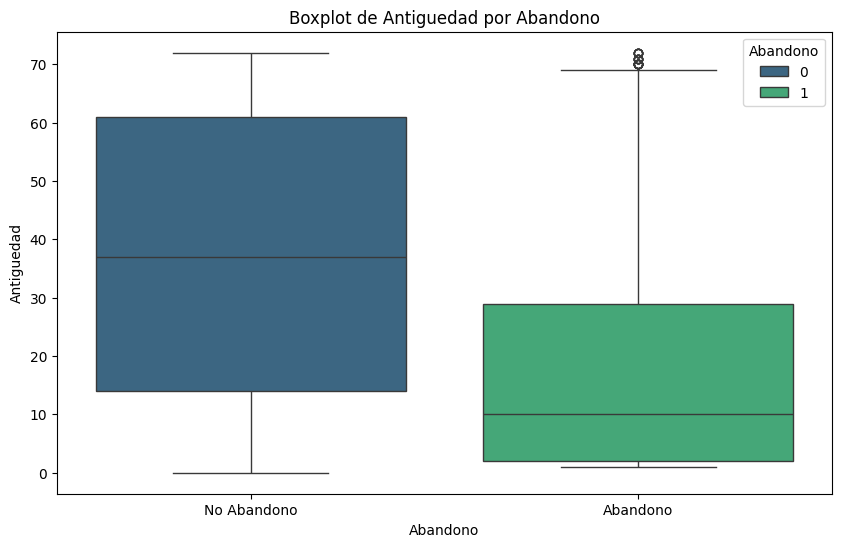

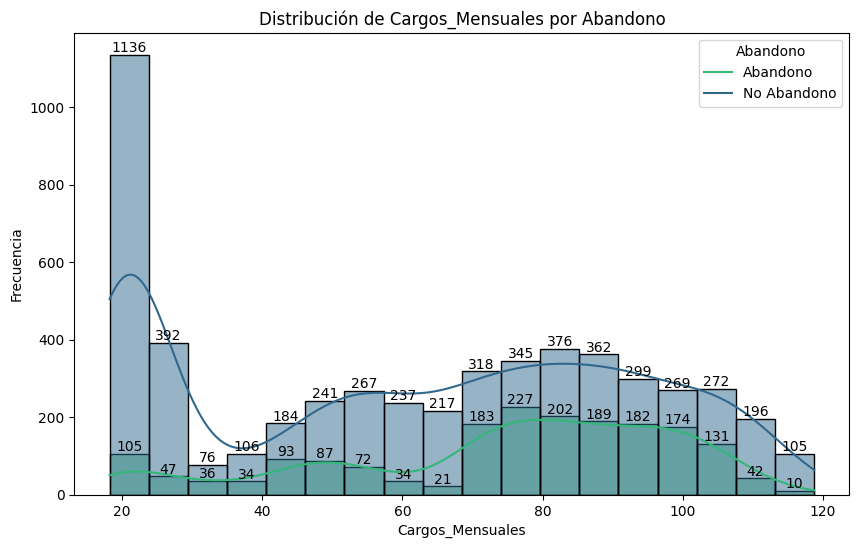

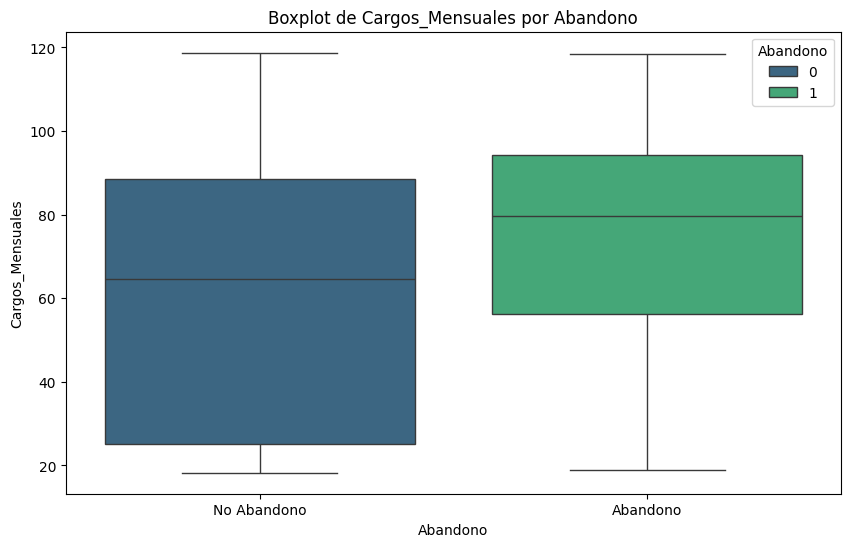

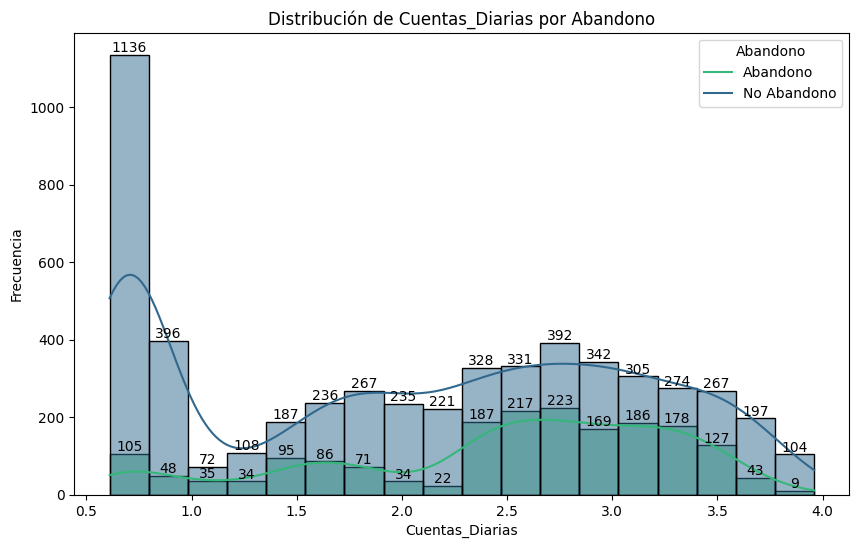

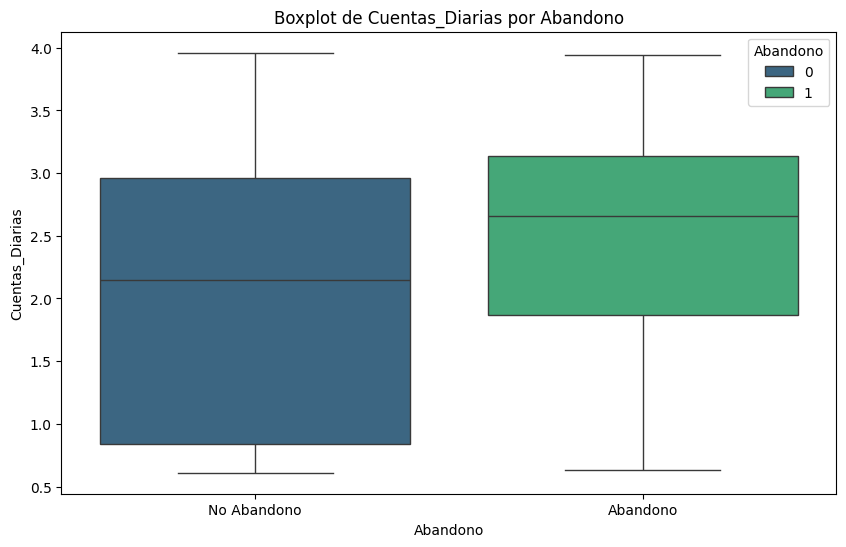

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables numéricas relevantes para analizar la distribución de abandono
numeric_cols = ['Cargos_Totales', 'Antiguedad', 'Cargos_Mensuales', 'Cuentas_Diarias']

# Explorar la distribución de variables numéricas por estado de abandono
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=datos, x=col, hue='Abandono', kde=True, palette='viridis')
    plt.title(f'Distribución de {col} por Abandono')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Abandono', labels=['Abandono', 'No Abandono'])

    # Add labels to the histogram bars
    for container in ax.containers:
        ax.bar_label(container)

    plt.show()

    # Usando boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=datos, x='Abandono', y=col, hue='Abandono', palette='viridis')
    plt.title(f'Boxplot de {col} por Abandono')
    plt.xlabel('Abandono')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['No Abandono', 'Abandono'])
    plt.show()

#📄Informe final

###Distribución de evasión
Este fue un analisis más general pero nos permitio saber que la mayoría de los clientes en este conjunto de datos no han abandonado el servicio, teniendo un total de 5398 clientes que siguen activos, por el lado contrario hay una cantidad mínima con un total de 1869 clientes que sí abandonaron.

###Evasión por variables categoricas
- Servicio de Internet: Los clientes con "Fiber optic" (Fibra óptica) muestran una proporción de abandono significativamente mayor en comparación con los clientes con "DSL" o aquellos sin servicio de internet. Esto sugiere que podría haber problemas de satisfacción o competencia con el servicio de fibra óptica.
- 	Contrato: Los clientes con contratos "Month-to-month" tienen una tasa de abandono mucho más alta que aquellos con contratos de uno o dos años. Esto es esperable, ya que los contratos a largo plazo implican un compromiso mayor por parte del cliente.
- Servicios Adicionales (Seguridad Online, Copia de Seguridad Online, Protección del Dispositivo, Soporte Técnico, Streaming TV, Streaming Películas): Los clientes que no tienen estos servicios adicionales tienden a abandonar más que aquellos que sí los tienen. Esto podría indicar que estos servicios añaden valor y contribuyen a la retención de clientes.
- Método de Pago: Los clientes que utilizan "Electronic check" como método de pago tienen una tasa de abandono considerablemente más alta que los que usan otros métodos de pago. Esto podría estar relacionado con la facilidad para cancelar el servicio o con problemas asociados a este método de pago.
-Pareja y Dependientes: Los clientes que no tienen Pareja o no tienen Dependientes parecen tener una tasa de abandono ligeramente mayor que aquellos que sí los tienen. Esto podría sugerir que los hogares con múltiples miembros o parejas tienen una mayor necesidad de mantener el servicio.
- Ciudadano Mayor: Los ciudadanos mayores tienen una proporción de abandono un poco más alta que los que no son ciudadanos mayores.

###Evasión por variables numéricas

- Antiguedad (Tenure): Se observa una clara diferencia en la distribución de la antigüedad entre los clientes que abandonan y los que no. Los clientes que abandonan tienden a tener una antigüedad mucho menor (concentrados en los primeros meses), mientras que los clientes que no abandonan tienen una distribución más amplia de antigüedad, con una proporción significativa de clientes con mayor antigüedad. Esto sugiere que la probabilidad de abandono es más alta en los primeros meses de servicio.
-	Cargos Mensuales (Monthly Charges): Los clientes que abandonan tienden a tener cargos mensuales promedio más altos en comparación con los clientes que no abandonan. Esto se puede ver tanto en los histogramas (la distribución de los que abandonan está un poco más desplazada hacia la derecha) como en las estadísticas descriptivas (la media de cargos mensuales es mayor para los que abandonan). Esto podría estar relacionado con los servicios adicionales que se mencionanaron antes (los que tienen más servicios pagan más y, si no tienen servicios de soporte o protección, son más propensos a abandonar) también puede ser la percepción de alto costo en relación con el valor recibido.
-	Cargos Totales (Total Charges): Los clientes que abandonan tienen cargos totales promedio significativamente menores que los que no abandonan. Esto es una consecuencia directa de su menor antigüedad. Los clientes que se quedan por más tiempo acumulan mayores cargos totales. Los boxplots ilustran muy bien esta diferencia en la distribución total de cargos.
-	Cuentas Diarias (Daily Charges): Similar a los cargos mensuales, los clientes que abandonan también muestran cargos diarios promedio ligeramente más altos.


##Sugerencias estratégicas

**1.Enfocarse en la Retención de Clientes Nuevos:**

Programas de Onboarding Mejorados: Implementar programas intensivos para los nuevos clientes en los primeros meses, ofreciendo soporte proactivo, tutoriales, y seguimiento para asegurar una experiencia positiva inicial.

Incentivos por Permanencia Temprana:
 Considerar ofrecer pequeños descuentos o beneficios adicionales a los clientes que permanecen activos durante los primeros 3-6 meses.

**2.Investigar y Mejorar el Servicio de Fibra Óptica:**

Análisis de Causa Raíz: Realizar una investigación profunda para identificar las razones detrás de la alta tasa de abandono en clientes de fibra óptica. ¿Son problemas técnicos, de velocidad, de atención al cliente, de precios comparados con la competencia?

Mejoras en la Infraestructura y Soporte: Si se identifican problemas técnicos, invertir en la mejora de la red de fibra. Fortalecer el soporte técnico especializado para usuarios de fibra.
**3.Incentivar Contratos a Largo Plazo:**

Planes de Contrato Atractivos: Ofrecer descuentos significativos o beneficios adicionales (por ejemplo, meses gratis, servicios premium) a los clientes que elijan contratos de uno o dos años en lugar de mes a mes.

Comunicación del Valor del Contrato: Educar a los clientes sobre los beneficios y la estabilidad que ofrecen los contratos a largo plazo.

**4.Promocionar y Resaltar el Valor de los Servicios Adicionales:**

Paquetes de Servicios: Crear paquetes atractivos que incluyan varios servicios adicionales a un precio competitivo.

Pruebas Gratuitas: Ofrecer períodos de prueba gratuitos para servicios adicionales, permitiendo a los clientes experimentar su valor antes de comprometerse.

Comunicación Dirigida: Identificar a los clientes sin servicios adicionales y comunicarles proactivamente los beneficios de añadirlos, especialmente aquellos servicios (como Seguridad Online o Soporte Técnico) que parecen tener un mayor impacto en la retención.
**5.Investigar Problemas con el Método de Pago "Electronic check":**

Análisis de la Experiencia del Usuario: Investigar si hay problemas o fricciones asociadas con el uso de "Electronic check" que puedan estar contribuyendo al abandono. ¿Es difícil cambiar de método de pago? ¿Hay problemas con las transacciones?

Promoción de Métodos de Pago Alternativos y Más Estables: Incentivar el uso de otros métodos de pago, como transferencias bancarias automáticas o tarjetas de crédito con beneficios.

**6.Segmentar a Clientes de Alto Gasto Mensual y Ofrecer Valor Adicional:**

Programas de Lealtad para Clientes Premium: Reconocer y recompensar a los clientes que tienen cargos mensuales altos.

Comunicación del Valor del Servicio: Asegurarse de que estos clientes perciban que el valor que reciben justifica su gasto. Ofrecerles acceso anticipado a nuevas funciones, soporte prioritario o beneficios exclusivos.

**7.Considerar Estrategias para Grupos Específicos:**

Programas para Ciudadanos Mayores: Evaluar si hay necesidades específicas en este grupo y cómo la empresa puede abordarlas para mejorar la satisfacción.

Ofertas para Hogares sin Pareja o Dependientes: Explorar si hay servicios o planes que se ajusten mejor a las necesidades de hogares unipersonales o sin dependientes.
